<h1>Traffic Signs Classification</h1>
<p>Using German Traffic Sign Dataset (http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset). You can download the from <a href="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/581faac4_traffic-signs-data/traffic-signs-data.zip"> here</a></p>

<h1>Imports</h1>

In [1]:
import matplotlib.pyplot as plt
import random as rn
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
from keras.models import Sequential
from keras.layers import Dense, Input, Activation
from keras.utils import np_utils
%matplotlib inline

Using TensorFlow backend.


<h1>Loading the Data</h1>

In [2]:
train_data = 'data/train.p'
test_data = 'data/test.p'

with open(train_data, 'rb') as f:
    train = pickle.load(f)

with open(test_data, 'rb') as f:
    test = pickle.load(f)

<h1>Data Info</h1>
<p>Spliting the train data as train and validation set</p>

In [3]:
X_train, X_val, Y_train, Y_val = train_test_split(train['features'], train['labels'], test_size=0.3, random_state=0)
X_test, Y_test = test['features'], test['labels']

n_train = X_train.shape[0]
n_val = X_val.shape[0]
n_test = X_test.shape[0]
image_shape = X_train.shape[1], X_train.shape[2]
n_channels = X_train.shape[3]
n_classes = np.unique(train['labels']).size

print('Train data size:\t\t\t', n_train)
print('Validation data size:\t\t\t', n_val)
print('test data size:\t\t\t\t', n_test)
print('Image shape:\t\t\t\t', image_shape)
print('Number of color channels in image:\t', n_channels)
print('Number of classes:\t\t\t', n_classes)

Train data size:			 27446
Validation data size:			 11763
test data size:				 12630
Image shape:				 (32, 32)
Number of color channels in image:	 3
Number of classes:			 43


<h2>Reshape All the Data</h2>

In [53]:
X_train_flat = X_train.reshape(-1, image_shape[0]*image_shape[1]*n_channels).astype('float32') 
X_val_flat = X_val.reshape(-1, image_shape[0]*image_shape[1]*n_channels).astype('float32') 

X_train_flat = (X_train_flat - np.mean(X_train_flat))/np.std(X_train_flat)
X_val_flat = (X_val_flat - np.mean(X_val_flat))/np.std(X_val_flat)

Y_train_cat = np_utils.to_categorical(Y_train, n_classes)
Y_val_cat = np_utils.to_categorical(Y_val, n_classes)

<h2>Some Random Image</h2>

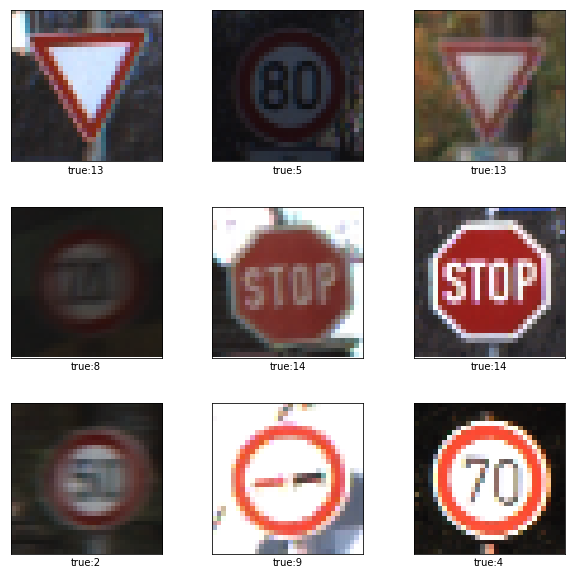

In [5]:
trc = rn.sample(range(n_train), 9)
fig, axes = plt.subplots(3, 3, figsize=(10,10))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i, ax in enumerate(axes.flat):
    ax.imshow(train['features'][trc[i]])
    ax.set_xlabel('true:{0}'.format(train['labels'][trc[i]]))
    ax.set_xticks([])
    ax.set_yticks([])

<h2>Build the Network with Keras</h2>

In [63]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(32*32*3,)))
model.add(Dense(43, activation='softmax'))

In [64]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_14 (Dense)             (None, 43)                5547      
Total params: 398,891
Trainable params: 398,891
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [66]:
history = model.fit(X_train_flat, Y_train_cat, batch_size=64, epochs=20, verbose=1, validation_data=(X_val_flat, Y_val_cat))

Train on 27446 samples, validate on 11763 samples
Epoch 1/20
27446/27446 [==============================] - 10s - loss: 1.4194 - acc: 0.6314 - val_loss: 0.7471 - val_acc: 0.7941
Epoch 2/20
27446/27446 [==============================] - 10s - loss: 0.5862 - acc: 0.8344 - val_loss: 0.5503 - val_acc: 0.8519
Epoch 3/20
27446/27446 [==============================] - 10s - loss: 0.4228 - acc: 0.8816 - val_loss: 0.4549 - val_acc: 0.8698
Epoch 4/20
27446/27446 [==============================] - 9s - loss: 0.3498 - acc: 0.9016 - val_loss: 0.4238 - val_acc: 0.8792
Epoch 5/20
27446/27446 [==============================] - 8s - loss: 0.3028 - acc: 0.9163 - val_loss: 0.3645 - val_acc: 0.9075
Epoch 6/20
27446/27446 [==============================] - 8s - loss: 0.2666 - acc: 0.9234 - val_loss: 0.3978 - val_acc: 0.9011
Epoch 7/20
27446/27446 [==============================] - 8s - loss: 0.2330 - acc: 0.9338 - val_loss: 0.3602 - val_acc: 0.9070
Epoch 8/20
27446/27446 [==============================] - 

In [67]:
history.history['val_acc'][-1]

0.95383830656458468

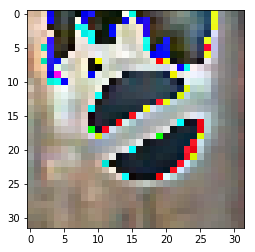

In [75]:
plt.imshow(X_train_flat[1000].reshape(32,32,3))

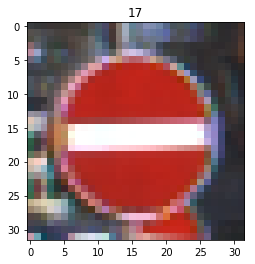

In [83]:
plt.imshow(X_test[1000])
plt.title(test['labels'][1000])

In [86]:
r = model.predict(X_test[1000].reshape(-1, 32*32*3))
r.argmax()

17

In [81]:
l = np.array([label.argmax() for label in Y_train_cat])

In [82]:
l.shape

(27446,)